### Import Statements

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

In [6]:
cab_df = pd.read_csv('/content/Cab_Data.csv')
city_df= pd.read_csv('/content/City.csv')
customer_df = pd.read_csv('/content/Customer_ID.csv')
transactions_df = pd.read_csv('/content/Transaction_ID.csv')

# Data Exploration

In [7]:
# For cab data

In [8]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [9]:
cab_df.shape

(359392, 7)

In [10]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [11]:
# Data Cleaning - Check for Missing Values and Duplicates

In [12]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [13]:
print(f'Any NaN values? {cab_df.isna().values.any()}')

Any NaN values? False


In [14]:
print(f'Any duplicates? {cab_df.duplicated().values.any()}')

Any duplicates? False


In [15]:
def convert_date(num):
    return (date(1899, 12, 30) + timedelta(days=num)).strftime("%Y-%m-%d")

In [16]:
cab_df['Date of Travel'] = cab_df['Date of Travel'].apply(convert_date)
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [17]:
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [18]:
# Descriptive Statistics

In [19]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,"359,392.00","359,392.00","359,392.00","359,392.00"
mean,"10,220,761.19",22.57,423.44,286.19
std,"126,805.80",12.23,274.38,157.99
min,"10,000,011.00",1.90,15.60,19.00
25%,"10,110,809.75",12.00,206.44,151.20
50%,"10,221,035.50",22.44,386.36,282.48
75%,"10,330,937.25",32.96,583.66,413.68
max,"10,440,107.00",48.00,"2,048.03",691.20


The average cost of the trip is 286.18 units, and the average price charged is 423.44 units, so this means an average profit of 137.25 units.

In [20]:
cab_df['Profit'] = cab_df['Price Charged'] - cab_df['Cost of Trip']
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84


In [21]:
# Data Visualization

How much is the average profit?

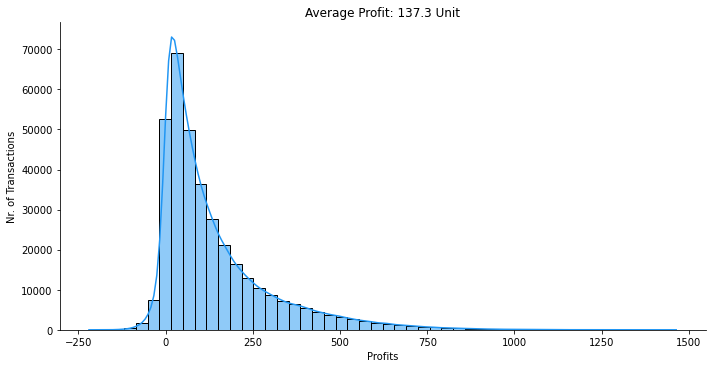

In [22]:
sns.displot(cab_df['Profit'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Average Profit: {(cab_df.Profit.mean()):.4} Unit')
plt.xlabel('Profits')
plt.ylabel('Nr. of Transactions')

plt.show()

In [23]:
cab_df['Profit'].idxmin()


118348

In [24]:
cab_df.loc[118348]

Transaction ID               10145287
Date of Travel    2017-02-19 00:00:00
Company                      Pink Cab
City                        DALLAS TX
KM Travelled                    44.80
Price Charged                  317.54
Cost of Trip                   537.60
Profit                        -220.06
Name: 118348, dtype: object

In [25]:
cab_df['Profit'].idxmax()

138644

In [26]:
cab_df.loc[138644]

Transaction ID               10170615
Date of Travel    2017-05-05 00:00:00
Company                    Yellow Cab
City                      NEW YORK NY
KM Travelled                    46.80
Price Charged                2,048.03
Cost of Trip                   584.06
Profit                       1,463.97
Name: 138644, dtype: object

In [27]:
cab_df['Price Charged'] = cab_df['Price Charged']/10

In [28]:
cab_df['Cost of Trip'] = cab_df['Cost of Trip']/10
cab_df['Profit'] = cab_df['Profit']/10

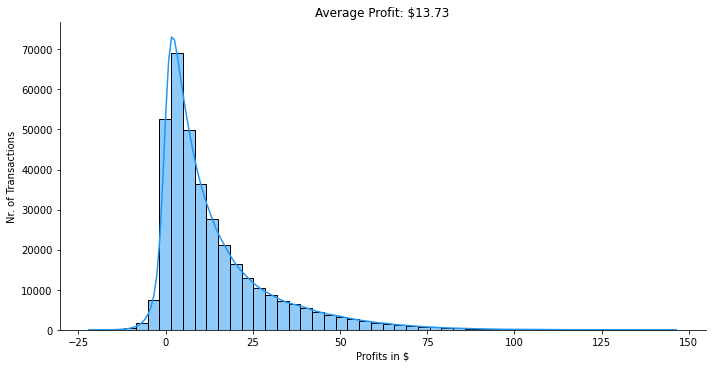

In [29]:
sns.displot(cab_df['Profit'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Average Profit: ${(cab_df.Profit.mean()):.4}')
plt.xlabel('Profits in $')
plt.ylabel('Nr. of Transactions')

plt.show()

In [30]:
cab_df.loc[118348]

Transaction ID               10145287
Date of Travel    2017-02-19 00:00:00
Company                      Pink Cab
City                        DALLAS TX
KM Travelled                    44.80
Price Charged                   31.75
Cost of Trip                    53.76
Profit                         -22.01
Name: 118348, dtype: object

In [31]:
cab_df.loc[138644]

Transaction ID               10170615
Date of Travel    2017-05-05 00:00:00
Company                    Yellow Cab
City                      NEW YORK NY
KM Travelled                    46.80
Price Charged                  204.80
Cost of Trip                    58.41
Profit                         146.40
Name: 138644, dtype: object

### What is the average profit of the companies per transaction?

In [32]:
pink_cab_df = cab_df.loc[(cab_df['Company'] == 'Pink Cab')]
pink_cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,37.09,31.36,5.73
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,35.85,33.49,2.37
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,12.52,9.76,2.76
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,37.74,35.16,2.58
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,11.46,9.78,1.68


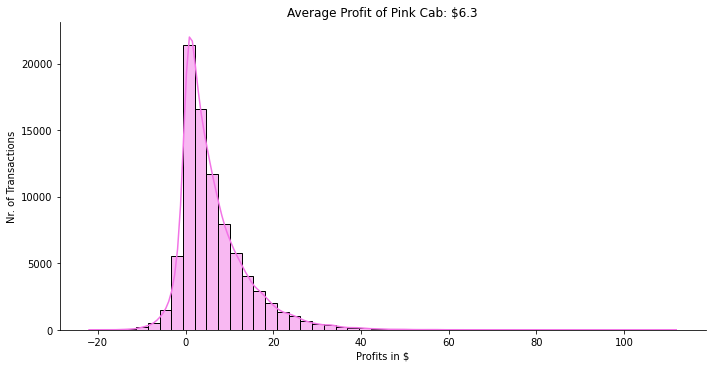

In [33]:
sns.displot(pink_cab_df['Profit'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#F273E6')

plt.title(f'Average Profit of Pink Cab: ${(pink_cab_df.Profit.mean()):.2}')
plt.xlabel('Profits in $')
plt.ylabel('Nr. of Transactions')

plt.show()

For Yellow Cab

In [34]:
yellow_cab_df = cab_df.loc[(cab_df['Company'] == 'Yellow Cab')]
yellow_cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,134.12,46.42,87.70
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,141.21,51.63,89.58
235,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,36.46,13.23,23.23
236,10000387,2016-01-06,Yellow Cab,ATLANTA GA,26.75,83.80,33.38,50.42
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,154.06,59.64,94.42


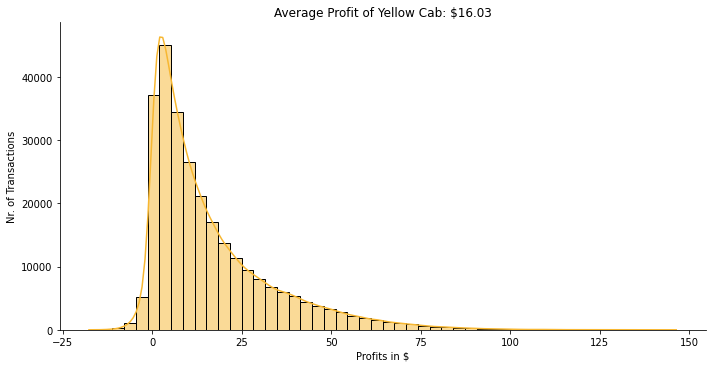

In [35]:
sns.displot(yellow_cab_df['Profit'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#f7b731')

plt.title(f'Average Profit of Yellow Cab: ${(yellow_cab_df.Profit.mean()):.4}')
plt.xlabel('Profits in $')
plt.ylabel('Nr. of Transactions')

plt.show()

### How much is the average KM travelled?

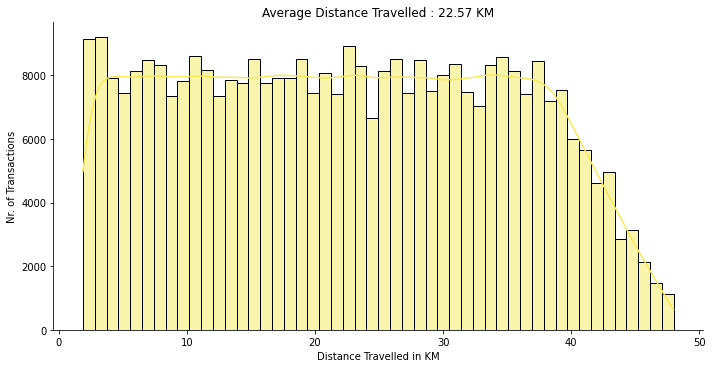

In [36]:
mean_of_travelled_KM = cab_df['KM Travelled'].mean()
sns.displot(cab_df['KM Travelled'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#F5EA5A')

plt.title(f'Average Distance Travelled : {(mean_of_travelled_KM):.4} KM')
plt.xlabel('Distance Travelled in KM')
plt.ylabel('Nr. of Transactions')

plt.show()

The average distance traveled is 22.57 km, and the average profit is $13.73

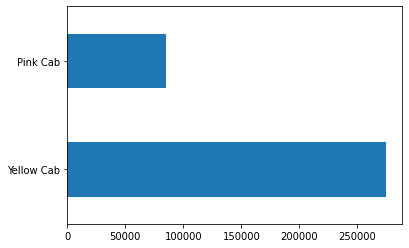

In [37]:
cab_df['Company'].value_counts().plot(kind='barh')

### What is the average cost per kilometer?

In [38]:
average_cost_per_km = cab_df['Cost of Trip'].sum() / cab_df['KM Travelled'].sum()
print(f'Average cost for travelled per km: ${average_cost_per_km:.2}')

Average cost for travelled per km: $1.3


### What is the average cost per kilometer for the Pink Cab firm?


In [39]:
cost_base_df = cab_df.groupby(['Company'], as_index=False).agg({'Cost of Trip':pd.Series.sum, 'KM Travelled':pd.Series.sum})
cost_base_df


,Company,Cost of Trip,KM Travelled
0,Pink Cab,"2,102,092.30","1,911,073.11"
1,Yellow Cab,"8,183,351.40","6,199,417.47"


In [40]:
pink_cab_average_cost = cost_base_df['Cost of Trip'].loc[0] / cost_base_df['KM Travelled'].loc[0]
yellow_cab_average_cost = cost_base_df['Cost of Trip'].loc[1] / cost_base_df['KM Travelled'].loc[1]
print(f'Pink cab average cost per kilometer: ${pink_cab_average_cost:.2}')
print(f'Yellow cab average cost per kilometer: ${yellow_cab_average_cost:.2}')

Pink cab average cost per kilometer: $1.1
Yellow cab average cost per kilometer: $1.3


### What is the charge for the same distance?

In [41]:
# df = df[(df.col1 > 8) & (df.col2 != 'A')]
twenty_two_km_df = cab_df[(cab_df['KM Travelled'] > 22) & (cab_df['KM Travelled'] < 23)]
twenty_two_km_df.shape

(8211, 8)

In [42]:
twenty_two_km_df.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
348419,10426502,2018-12-13,Yellow Cab,NEW YORK NY,22.08,53.08,27.56,25.53
250427,10306557,2018-03-03,Yellow Cab,NEW YORK NY,22.47,57.12,28.31,28.81
99681,10122325,2016-12-16,Yellow Cab,NEW YORK NY,22.88,49.01,28.83,20.18
18105,10022990,2016-04-09,Yellow Cab,DENVER CO,22.47,35.95,31.55,4.40
25960,10032884,2016-05-11,Yellow Cab,NEW YORK NY,22.88,57.30,29.93,27.37


In [43]:
df = twenty_two_km_df[twenty_two_km_df['KM Travelled'] == 22.89]
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
603,10000754,2016-01-05,Yellow Cab,LOS ANGELES CA,22.89,51.00,31.59,19.41
836,10000987,2016-01-10,Yellow Cab,NEW YORK NY,22.89,62.76,31.86,30.89
1424,10001876,2016-01-17,Yellow Cab,CHICAGO IL,22.89,51.76,30.49,21.27
1440,10001892,2016-01-17,Yellow Cab,CHICAGO IL,22.89,49.34,28.57,20.77
1694,10002146,2016-01-15,Yellow Cab,NEW YORK NY,22.89,54.03,31.04,23.00


In [44]:
df.sample(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
255138,10312587,2018-03-23,Yellow Cab,LOS ANGELES CA,22.89,38.36,32.41,5.95
196923,10242064,2017-10-23,Pink Cab,SILICON VALLEY,22.89,29.52,23.81,5.72
106236,10130152,2016-12-29,Yellow Cab,NEW YORK NY,22.89,63.09,32.14,30.95
265131,10325301,2018-05-03,Yellow Cab,LOS ANGELES CA,22.89,42.07,32.14,9.93


Pink Cab has lower travel costs and Yellow Cab has higher travel costs.

In [45]:
# Data exploration for city_df

In [46]:
city_df.shape

(20, 3)

In [47]:
city_df.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [48]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [49]:
city_df.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [50]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [51]:
# Data exploration for customer_df

In [52]:
customer_df.shape

(49171, 4)

In [53]:
customer_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [54]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [55]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [56]:
# Data Cleaning - Check for Missing Values and Duplicates for customer_df

In [57]:
print(f'Any NaN values? {customer_df.isna().values.any()}')

Any NaN values? False


In [58]:
print(f'Any duplicates? {customer_df.duplicated().values.any()}')

Any duplicates? False


Descriptive Statistics for Customer Data

In [59]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,"49,171.00","49,171.00","49,171.00"
mean,"28,398.25",35.36,"15,015.63"
std,"17,714.14",12.60,"8,002.21"
min,1.00,18.00,"2,000.00"
25%,"12,654.50",25.00,"8,289.50"
50%,"27,631.00",33.00,"14,656.00"
75%,"43,284.50",42.00,"21,035.00"
max,"60,000.00",65.00,"35,000.00"


In [60]:
# Data exploration for transactions_df

In [61]:
transactions_df.shape

(440098, 3)

In [62]:
transactions_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [63]:
transactions_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


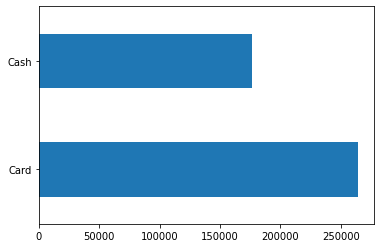

In [64]:
transactions_df['Payment_Mode'].value_counts().plot(kind='barh')

In [65]:
transactions_df['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

What percentage of the transactions is cash?

In [66]:
cash_percentage = 176107/transactions_df.shape[0]
print(f'Cash percentage is {cash_percentage:.2%}')

Cash percentage is 40.02%


In [67]:
# Data Cleaning - Check for Missing Values and Duplicates For Transactions Data

In [68]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [69]:
print(f'Any NaN values? {transactions_df.isna().values.any()}')

Any NaN values? False


In [70]:
print(f'Any duplicates? {transactions_df.duplicated().values.any()}')

Any duplicates? False


In [71]:
# Descriptive Statistics

In [72]:
transactions_df.describe()

,Transaction ID,Customer ID
count,"440,098.00","440,098.00"
mean,"10,220,059.50","23,619.51"
std,"127,045.49","21,195.55"
min,"10,000,011.00",1.00
25%,"10,110,035.25","3,530.00"
50%,"10,220,059.50","15,168.00"
75%,"10,330,083.75","43,884.00"
max,"10,440,108.00","60,000.00"


## Which firms make more profit, according to the cab_df?


In [73]:
firms_df = cab_df.groupby(['Company'], as_index=False).agg({'Profit':pd.Series.sum})
firms_df

,Company,Profit
0,Pink Cab,"530,732.83"
1,Yellow Cab,"4,402,037.32"


In [74]:
bar = px.bar(x=['Pink Cab (530k)', 'Yellow Cab (4.4M)'],
             y=firms_df.Profit.values,
             color=firms_df.Profit.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Which firm makes more profit')

bar.update_layout(xaxis_title='Firms', 
                  yaxis_title='Profit',
                  coloraxis_showscale=False)
bar.show()

How long did it take to make these profits?

In [75]:
cab_df['Date of Travel'].idxmin()


2

In [76]:
cab_df['Date of Travel'].idxmax()

353891

In [77]:
cab_df.loc[2]

Transaction ID               10000013
Date of Travel    2016-01-02 00:00:00
Company                      Pink Cab
City                       ATLANTA GA
KM Travelled                     9.04
Price Charged                   12.52
Cost of Trip                     9.76
Profit                           2.76
Name: 2, dtype: object

In [78]:
cab_df.loc[353891]

Transaction ID               10433076
Date of Travel    2018-12-31 00:00:00
Company                      Pink Cab
City                       ATLANTA GA
KM Travelled                    17.82
Price Charged                   23.86
Cost of Trip                    19.07
Profit                           4.79
Name: 353891, dtype: object

It took them three years to make the profits above. Pink Cab's yearly profit was 176k and Yellow Cab's yearly profit was 1.45M

### Which city is making more profit?

In [79]:
city_company_df = cab_df.groupby(['City', 'Company'], as_index=False).agg({'Profit':pd.Series.sum})
city_company_df.head(12)

,City,Company,Profit
0,ATLANTA GA,Pink Cab,"9,605.01"
1,ATLANTA GA,Yellow Cab,"74,638.28"
2,AUSTIN TX,Pink Cab,"14,744.53"
3,AUSTIN TX,Yellow Cab,"37,925.57"
4,BOSTON MA,Pink Cab,"26,200.17"
5,BOSTON MA,Yellow Cab,"150,671.76"
6,CHICAGO IL,Pink Cab,"31,872.25"
7,CHICAGO IL,Yellow Cab,"306,859.09"
8,DALLAS TX,Pink Cab,"2,473.01"
9,DALLAS TX,Yellow Cab,"110,400.32"


In [80]:
cc_bar = px.bar(x = city_company_df.City,
                     y = city_company_df.Profit,
                     color = city_company_df.Company,
                     title='Which City is making more profit?')

cc_bar.update_layout(xaxis_title='Cities', 
                          yaxis_title='Profit')
cc_bar.show()

Both the pink and yellow cabs make the most profit in New York.

### What do the profits look like when New York City is excluded?  

In [81]:
city_company_df = city_company_df[city_company_df['City'] != 'NEW YORK NY']


In [82]:
new_cc_bar = px.bar(x = city_company_df.City,
                     y = city_company_df.Profit,
                     color = city_company_df.Company,
                     title='What do the profits look like when New York City is excluded?')

new_cc_bar.update_layout(xaxis_title='Cities', 
                          yaxis_title='Profit')
new_cc_bar.show()

### How have their profits changed over time?

In [83]:
date_company_df = cab_df.groupby(['Date of Travel', 'Company'], as_index=False).agg({'Profit':pd.Series.sum})
print(date_company_df.shape)
date_company_df.head()

(2190, 3)


,Date of Travel,Company,Profit
0,2016-01-02,Pink Cab,480.94
1,2016-01-02,Yellow Cab,"4,529.56"
2,2016-01-03,Pink Cab,"1,062.06"
3,2016-01-03,Yellow Cab,"3,844.95"
4,2016-01-04,Pink Cab,42.86


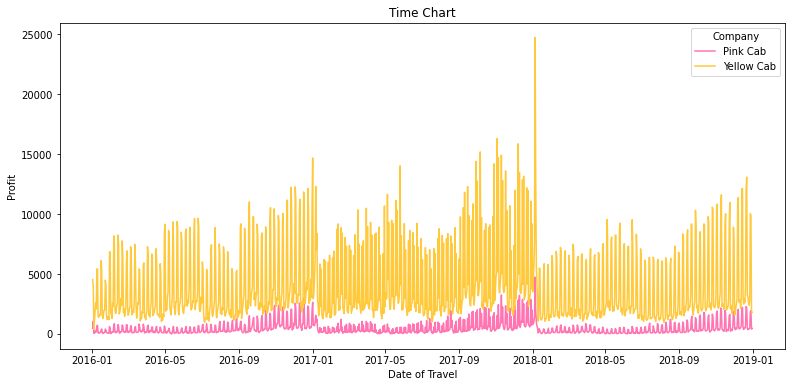

In [84]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'Date of Travel', y = 'Profit', data = date_company_df, hue = 'Company', 
             palette = ['#FF74B1', '#FFC93C']);

plt.title('Time Chart');
plt.xlabel('Date of Travel');
plt.ylabel('Profit');


In [85]:
date_company_df['Profit'].idxmax()


1469

In [86]:
date_company_df.loc[1469]

Date of Travel    2018-01-05 00:00:00
Company                    Yellow Cab
Profit                      24,750.62
Name: 1469, dtype: object

In [87]:
date_company_df['Profit'].idxmin()

262

In [88]:
date_company_df.loc[4]

Date of Travel    2016-01-04 00:00:00
Company                      Pink Cab
Profit                          42.86
Name: 4, dtype: object

While the profits of both companies increase toward the end of the year, we see that the yellow cab company makes better use of seasonal profit increase opportunities.

In [89]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit'],
      dtype='object')

In [90]:
city_df.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [91]:
customer_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [92]:
transactions_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

### Which city has more users?

In [93]:
# city_df.sort_values('Users', ascending=False, inplace=True)
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [94]:
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837",302149
1,CHICAGO IL,"1,955,130",164468
2,LOS ANGELES CA,"1,595,037",144132
3,MIAMI FL,"1,339,155",17675
4,SILICON VALLEY,"1,177,609",27247


In [95]:
city_df.sort_values('Users', ascending=False, inplace=True)
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837",302149
14,SAN FRANCISCO CA,"629,591",213609
1,CHICAGO IL,"1,955,130",164468
2,LOS ANGELES CA,"1,595,037",144132
17,WASHINGTON DC,"418,859",127001


In [96]:
user_bar = px.bar(x = city_df.City,
                     y = city_df.Users,
                     title='Cab Users by City')

user_bar.update_layout(xaxis_title='Cities', 
                          yaxis_title='Users')
user_bar.show()

Pink Cab can be considered a company with a high potential for profit if it can demonstrate its success outside of Los Angeles in cities such as New York, Chicago, Washington, and Boston.

In [97]:
# checking if cities in city_df are in cab_df
np.setdiff1d(city_df.City, cab_df.City) 


array(['SAN FRANCISCO CA'], dtype=object)

There is no San Francisco in the cab_df dataset, so we can drop San Francisco

In [98]:
city_df.shape

(20, 3)

In [99]:
city_df = city_df[city_df['City'] != 'SAN FRANCISCO CA']
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837",302149
1,CHICAGO IL,"1,955,130",164468
2,LOS ANGELES CA,"1,595,037",144132
17,WASHINGTON DC,"418,859",127001
19,BOSTON MA,"248,968",80021


In [100]:
city_df.shape

(19, 3)

## What is the average income of customers?

In [101]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [102]:
customer_df.shape

(49171, 4)

In [103]:
customer_df['Customer ID'].nunique()

49171

In [104]:
customer_df['Income (USD/Month)'].mean()

15015.631856175389


The average monthly income of taxi customers is $15015

### Which company accepts more cards as a payment method?

In [105]:
transactions_df.shape

(440098, 3)

In [106]:
cab_df.shape

(359392, 8)

In [107]:
cab_trans_df = pd.merge(cab_df, transactions_df, on='Transaction ID')
print(cab_trans_df.shape)
cab_trans_df.head(7)

(359392, 10)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,37.09,31.36,5.73,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,35.85,33.49,2.37,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,12.52,9.76,2.76,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,37.74,35.16,2.58,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,11.46,9.78,1.68,27182,Card
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,7.24,6.30,0.94,27318,Cash
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,57.61,47.52,10.09,33788,Card


In [108]:
card_vs_cash_df = cab_trans_df.groupby(['Company'], as_index=False).agg({'Payment_Mode':pd.Series.value_counts})
card_vs_cash_df.head()

,Company,Payment_Mode
0,Pink Cab,"[50719, 33992]"
1,Yellow Cab,"[164785, 109896]"


In [109]:
card_vs_cash_df = cab_trans_df.groupby('Payment_Mode').count()
card_vs_cash_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID
Payment_Mode,,,,,,,,,
Card,215504,215504,215504,215504,215504,215504,215504,215504,215504
Cash,143888,143888,143888,143888,143888,143888,143888,143888,143888


In [110]:
50719 + 164785

215504

In [111]:
# Number of payments received in cash for pink cab: 33992
# Number of payments received with card for pink cab: 50719

# Number of payments received in cash for yellow cab: 109896
# Number of payments received with card for yellow cab: 164785

In [112]:
cc_df=pd.DataFrame({'Company':['Pink Cab', 'Yellow Cab'],
                    'Card':[50719, 164785],
                    'Cash':[33992, 109896]})
cc_df

,Company,Card,Cash
0,Pink Cab,50719,33992
1,Yellow Cab,164785,109896


In [113]:
fig = px.pie(cc_df, names=cc_df.Company, values='Card', title="Which company accepts more cards as a payment method?")
fig.update_traces(textfont_size=15)
fig.show()

In [114]:
fig = px.pie(cc_df, names=cc_df.Company, values='Cash', title="Which company accepts more cash as a payment method?")
fig.update_traces(textfont_size=15)
fig.show()

In [115]:
# Pink card percentage
50719/(50719 + 33992)

0.5987297989635348

In [116]:
# Yellow card percentage
164785/(164785 + 109896)

0.5999140821534799

## Which company is preferred by high-income customers?

In [117]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [118]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,"49,171.00","49,171.00","49,171.00"
mean,"28,398.25",35.36,"15,015.63"
std,"17,714.14",12.60,"8,002.21"
min,1.00,18.00,"2,000.00"
25%,"12,654.50",25.00,"8,289.50"
50%,"27,631.00",33.00,"14,656.00"
75%,"43,284.50",42.00,"21,035.00"
max,"60,000.00",65.00,"35,000.00"


In [119]:
high_income_c_df = customer_df[customer_df['Income (USD/Month)'] > 21035]
high_income_c_df.shape

(12292, 4)

In [120]:
high_income_c_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
3,28020,Male,23,23327
6,33788,Male,23,23788
10,58774,Male,20,23602
11,58627,Male,28,27338
17,58346,Male,27,21650


In [121]:
cab_trans_df.shape

(359392, 10)

In [122]:
new_df_with_high_income = pd.merge(cab_trans_df, high_income_c_df, on='Customer ID')
new_df_with_high_income.shape

(89812, 13)

In [123]:
new_df_with_high_income.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,37.74,35.16,2.58,28020,Cash,Male,23,23327
1,10094994,2016-10-27,Pink Cab,ATLANTA GA,41.44,52.21,48.48,3.73,28020,Cash,Male,23,23327
2,10140112,2017-01-27,Yellow Cab,ATLANTA GA,24.72,51.57,32.33,19.23,28020,Card,Male,23,23327
3,10326470,2018-05-11,Pink Cab,ATLANTA GA,34.00,45.12,40.80,4.32,28020,Cash,Male,23,23327
4,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,57.61,47.52,10.09,33788,Card,Male,23,23788


In [124]:
print(f'Any duplicates? {new_df_with_high_income.duplicated().values.any()}')

Any duplicates? False


In [125]:
print(f'Any NaN values among the data? {new_df_with_high_income.isna().values.any()}')

Any NaN values among the data? False


In [126]:
new_df_with_high_income['Company'].value_counts()

Yellow Cab    68551
Pink Cab      21261
Name: Company, dtype: int64

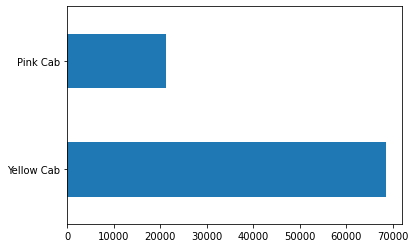

In [127]:
new_df_with_high_income['Company'].value_counts().plot(kind='barh')

In [128]:
new_df_with_high_income.sort_values(by='Income (USD/Month)', inplace=True)
new_df_with_high_income.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
75377,10168633,2017-04-23,Yellow Cab,PITTSBURGH PA,12.84,21.41,15.41,6.00,49500,Cash,Male,50,21036
75376,10108332,2016-11-17,Yellow Cab,PITTSBURGH PA,4.24,4.89,5.80,-0.91,49500,Cash,Male,50,21036
80000,10127740,2016-12-17,Yellow Cab,SILICON VALLEY,38.11,93.52,46.65,46.88,14774,Card,Male,23,21036
80001,10166839,2017-04-16,Yellow Cab,SILICON VALLEY,35.70,78.39,48.41,29.98,14774,Card,Male,23,21036
80002,10287713,2017-12-25,Yellow Cab,SILICON VALLEY,11.22,23.02,14.95,8.07,14774,Cash,Male,23,21036


In [129]:
new_df_with_high_income.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
16824,10149306,2017-02-21,Yellow Cab,WASHINGTON DC,25.92,38.50,35.77,2.73,51640,Cash,Female,35,34996
16823,10082608,2016-09-25,Pink Cab,WASHINGTON DC,4.00,5.71,4.12,1.59,51640,Card,Female,35,34996
16821,10053812,2016-07-15,Yellow Cab,WASHINGTON DC,13.09,16.60,16.81,-0.21,51640,Cash,Female,35,34996
16828,10347631,2018-07-07,Yellow Cab,WASHINGTON DC,39.27,60.62,47.60,13.03,51640,Card,Female,35,34996
80057,10098630,2016-11-05,Pink Cab,DENVER CO,10.20,12.90,10.40,2.49,31303,Cash,Male,53,35000


High-income people chose Pink Cab 21261 times while Yellow Cab 68551 times. As a result, the Yellow Cab Company is preferred over three times more than the Pink Cab Company, or it has a greater number of taxis.

In [130]:
low_income_c_df = customer_df[customer_df['Income (USD/Month)'] < 8290]
low_income_c_df.shape

(12293, 4)

In [131]:
low_income_c_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
9,57982,Male,57,5068
12,59007,Male,63,6683
13,58215,Male,25,6862
14,59372,Male,53,4912
20,59804,Male,31,4550


In [132]:
new_df_with_lc = pd.merge(cab_trans_df, low_income_c_df, on='Customer ID')
new_df_with_lc.shape

(88035, 13)

In [133]:
new_df_with_lc.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,15.70,11.33,4.37,57982,Cash,Male,57,5068
1,10004643,2016-01-26,Yellow Cab,BOSTON MA,37.62,70.69,49.66,21.04,57982,Cash,Male,57,5068
2,10036758,2016-05-22,Yellow Cab,BOSTON MA,5.20,9.75,6.36,3.39,57982,Cash,Male,57,5068
3,10082851,2016-09-24,Yellow Cab,BOSTON MA,27.16,43.57,36.18,7.39,57982,Cash,Male,57,5068
4,10184660,2017-06-17,Yellow Cab,BOSTON MA,44.46,76.12,63.49,12.63,57982,Card,Male,57,5068


In [134]:
new_df_with_lc.sort_values('Income (USD/Month)', inplace=True)
new_df_with_lc.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
64261,10321772,2018-04-18,Yellow Cab,SEATTLE WA,22.47,37.23,32.36,4.87,38102,Card,Male,38,2000
86768,10318330,2018-04-16,Pink Cab,SILICON VALLEY,22.80,38.12,27.13,10.99,14053,Cash,Female,27,2000
64259,10205099,2017-08-02,Yellow Cab,SEATTLE WA,29.68,52.56,38.47,14.09,38102,Cash,Male,38,2000
86769,10350088,2018-07-11,Yellow Cab,SILICON VALLEY,19.60,38.34,26.34,12.00,14053,Card,Female,27,2000
64260,10291183,2018-01-05,Yellow Cab,SEATTLE WA,5.76,10.16,7.19,2.97,38102,Card,Male,38,2000


In [135]:
new_df_with_lc.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
65703,10061750,2016-08-13,Pink Cab,LOS ANGELES CA,35.70,37.78,39.63,-1.85,7479,Card,Female,48,8289
65704,10133094,2017-01-01,Yellow Cab,LOS ANGELES CA,10.80,18.63,14.00,4.64,7479,Card,Female,48,8289
65705,10175233,2017-05-20,Yellow Cab,LOS ANGELES CA,17.68,31.29,24.19,7.11,7479,Cash,Female,48,8289
65711,10293792,2018-01-12,Yellow Cab,LOS ANGELES CA,33.32,60.13,40.38,19.75,7479,Cash,Female,48,8289
65702,10045049,2016-06-24,Pink Cab,LOS ANGELES CA,20.16,21.95,23.59,-1.64,7479,Card,Female,48,8289


In [136]:
gg_df = new_df_with_lc.loc[(new_df_with_lc['Customer ID'] == 7479)]

In [137]:
gg_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
65718,10430898,2018-12-21,Yellow Cab,LOS ANGELES CA,24.84,43.24,34.28,8.96,7479,Card,Female,48,8289
65717,10421840,2018-12-05,Yellow Cab,LOS ANGELES CA,25.52,42.67,34.61,8.06,7479,Cash,Female,48,8289
65716,10405537,2018-11-10,Yellow Cab,LOS ANGELES CA,15.52,27.15,20.67,6.48,7479,Cash,Female,48,8289
65715,10366082,2018-08-27,Yellow Cab,LOS ANGELES CA,7.28,10.60,9.17,1.42,7479,Card,Female,48,8289
65714,10356006,2018-08-03,Pink Cab,LOS ANGELES CA,21.21,22.59,24.82,-2.23,7479,Card,Female,48,8289
65713,10341728,2018-06-22,Yellow Cab,LOS ANGELES CA,39.44,75.08,50.17,24.91,7479,Card,Female,48,8289
65712,10298633,2018-02-04,Yellow Cab,LOS ANGELES CA,18.36,32.53,22.03,10.50,7479,Card,Female,48,8289
65710,10259620,2017-11-12,Yellow Cab,LOS ANGELES CA,33.28,54.06,47.12,6.93,7479,Cash,Female,48,8289
65709,10251006,2017-11-04,Yellow Cab,LOS ANGELES CA,33.66,59.43,43.22,16.21,7479,Card,Female,48,8289
65708,10231108,2017-09-29,Yellow Cab,LOS ANGELES CA,11.80,25.95,16.99,8.95,7479,Card,Female,48,8289


In [138]:
new_df_with_lc['Company'].value_counts()

Yellow Cab    67132
Pink Cab      20903
Name: Company, dtype: int64

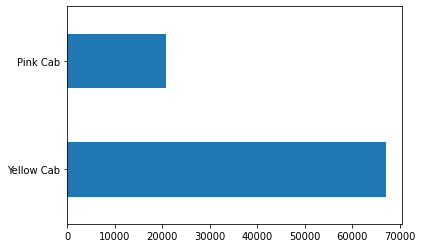

In [139]:
new_df_with_lc['Company'].value_counts().plot(kind='barh')

Regardless of customers' income, the yellow cab company has been preferred more than three times. Considering a single customer, the pink cab company made a loss in each transaction, while the yellow cab company made a profit.

# Conclusions



*   While the average profit per transaction is \\$13.73, this figure is \\$6.3 dollars for Pink Cab and \$16.03 dollars for Yellow Cab.

*   Pink Cab has a lower travel cost, and Yellow Cab has a higher travel cost. But despite this, the Yellow Cab makes more profit.

*   In total, Yellow Cab makes more than eight times more profit than Pink Cab.

*   The city with the highest profit for both companies is New York. Yellow Cab's profit in this city exceeds $2.5 million.

*   The five cities with the most taxi users are New York, San Francisco, Chicago, Los Angeles, and Washington, respectively.

*   While the profits of both companies increase toward the end of the year, we see that the yellow cab company makes better use of seasonal profit increase opportunities.

*   Both companies are selected at the same rate, regardless of the income level of the customers.

